In [218]:
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
df_genres = pd.read_csv('tmdb_genres.csv')
df_genres.head()

,Unnamed: 0,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [220]:
df_movies = pd.read_csv('tmdb_movies.csv')
df_movies.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


# Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [221]:
df_movies.loc[:,'vote_count']

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4798      238
4799        5
4800        6
4801        7
4802       16
Name: vote_count, Length: 4803, dtype: int64

In [222]:
percentyl50=df_movies.quantile([.5])
percentyl50


C:\Users\lukpy\AppData\Local\Temp\ipykernel_14524\865506467.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentyl50=df_movies.quantile([.5])


,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
0.5,2401.0,15000000.0,14629.0,12.921594,19170001.0,103.0,6.2,235.0,28.0


In [223]:
percentyl75=df_movies.quantile([.75])
percentyl75

C:\Users\lukpy\AppData\Local\Temp\ipykernel_14524\260978553.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentyl75=df_movies.quantile([.75])


,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
0.75,3601.5,40000000.0,58610.5,28.313505,92917187.0,118.0,6.8,737.0,35.0


In [224]:
kwartyl3_low=percentyl50.loc[0.5,'vote_count']
kwartyl3_low

235.0

In [225]:
kwartyl3_high=percentyl75.loc[0.75, 'vote_count']
kwartyl3_high

737.0

In [226]:
df_movies1=df_movies[(df_movies['vote_count']>=kwartyl3_low) & (df_movies['vote_count']<kwartyl3_high)]
df_movies1.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
104,104,160000000,http://www2.warnerbros.com/poseidon/,503,en,Poseidon,A packed cruise ship traveling the Atlantic is...,21.133748,2006-05-12,181674817,99.0,Released,Mayday,Poseidon,5.5,583,12.0
131,131,150000000,http://disney.go.com/disneypictures/gforce/,19585,en,G-Force,"A team of trained secret agent animals, guinea...",26.710398,2009-07-21,292817841,88.0,Released,The world needs bigger heroes,G-Force,5.1,510,14.0
135,135,150000000,http://www.thewolfmanmovie.com/,7978,en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,2010-02-11,0,102.0,Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,18.0
155,155,100000000,http://www.sonypictures.com/movies/funwithdick...,7552,en,Fun with Dick and Jane,After Dick Harper loses his job at Globodyne i...,25.159168,2005-12-21,202026112,90.0,Released,Giving big businesses a run for their money!,Fun with Dick and Jane,5.9,627,35.0
162,162,135000000,NaN,10048,en,Stealth,Deeply ensconced in a top-secret military prog...,17.889530,2005-07-28,76932943,121.0,Released,Fear The Sky,Stealth,4.9,331,28.0


In [227]:
df_movies2=df_movies1.sort_values(by='vote_average', ascending=False)
df_movies2.iloc[:10, 5]

3906                              The Apartment
2638                                 Metropolis
4076                      To Kill a Mockingbird
4432                          On the Waterfront
3854    Batman: The Dark Knight Returns, Part 2
3206                                    Polisse
3414                                  Incendies
3526                                  The Sting
3570                           The Elephant Man
2860                                   Das Boot
Name: original_title, dtype: object

# Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [228]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies['year']=df_movies['release_date'].dt.year
df_movies.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0


In [229]:
df_movies3=df_movies[((df_movies['year']>=2010) & (df_movies['year']<=2016))]
df_movies3.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0
6,6,260000000,http://disney.go.com/disneypictures/tangled/,38757,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,2010-11-24,591794936,100.0,Released,They're taking adventure to new lengths.,Tangled,7.4,3330,16.0,2010.0
7,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,2015-04-22,1405403694,141.0,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,28.0,2015.0


In [230]:
df_movies4=df_movies3.groupby('year').agg({'budget':'mean','revenue':'mean'})
df_movies4

,budget,revenue
year,,
2010.0,3.449541e+07,9.043811e+07
2011.0,3.477232e+07,9.200413e+07
2012.0,3.492203e+07,1.160659e+08
2013.0,3.552329e+07,1.013485e+08
2014.0,3.095989e+07,1.013466e+08
2015.0,3.113216e+07,1.054399e+08
2016.0,4.570327e+07,1.390496e+08


In [231]:
df_movies4.reset_index(inplace=True)
df_movies4

,year,budget,revenue
0,2010.0,3.449541e+07,9.043811e+07
1,2011.0,3.477232e+07,9.200413e+07
2,2012.0,3.492203e+07,1.160659e+08
3,2013.0,3.552329e+07,1.013485e+08
4,2014.0,3.095989e+07,1.013466e+08
5,2015.0,3.113216e+07,1.054399e+08
6,2016.0,4.570327e+07,1.390496e+08


In [232]:
def million(x, pos):
        return 'USD {:2.0f}M'.format(x*1e-6)

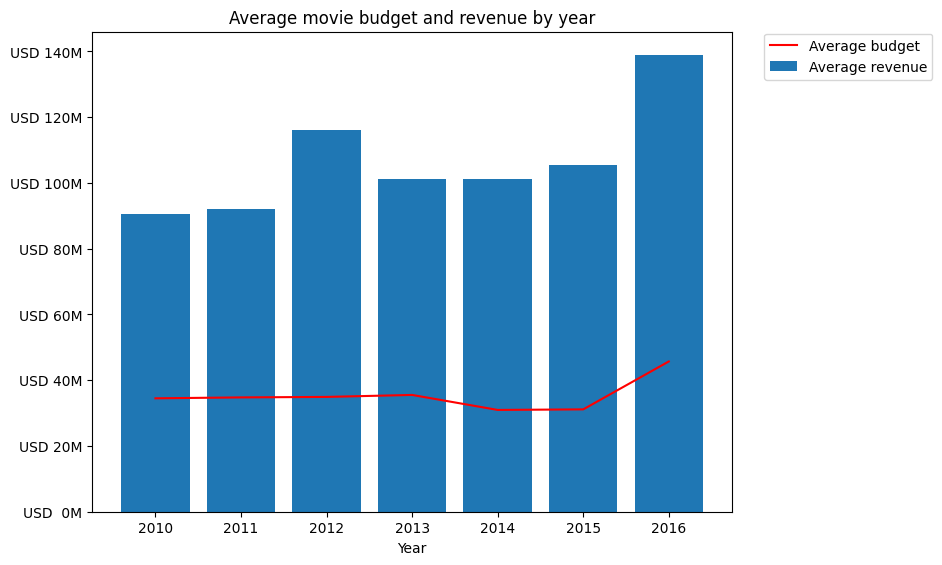

In [233]:
fig1 = plt.figure()
axes = fig1.add_axes([0,0,1,1])
years=df_movies4.iloc[:,0]
revenue=df_movies4.iloc[:, 2]
budget=df_movies4.iloc[:, 1]
axes.bar(years, revenue, label='Average revenue')
axes.plot(years, budget, c='red', label='Average budget')
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.legend(loc=(1.05,0.9))
axes.set_xlabel('Year')
plt.title('Average movie budget and revenue by year')
plt.show()


# Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [234]:
df_genres.columns=['genre_id', 'genre']
df_genres.head()

,genre_id,genre
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [235]:
df_movies5=pd.merge(df_movies, df_genres, how='left', on='genre_id')
df_movies5.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,year,genre
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,2009.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,2007.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,2015.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,2012.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,2012.0,Action


# Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [236]:
df_movies6=df_movies5['genre'].value_counts().sort_values(ascending=False)
df_movies6.head()

Drama        1207
Comedy       1042
Action        754
Adventure     339
Horror        300
Name: genre, dtype: int64

Najczęstszym gatunkiem filmów pojawiającym się w bazie jest Drama, jest 1207 filmów przynależących do tego gatunku.

# Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [237]:
df_movies7=df_movies5.groupby('genre').agg({'runtime':'mean'}).sort_values(by='runtime', ascending=False)
df_movies7.head()

,runtime
genre,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947


Najdłużej trwają filmy historyczne.

# Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<AxesSubplot: ylabel='Frequency'>

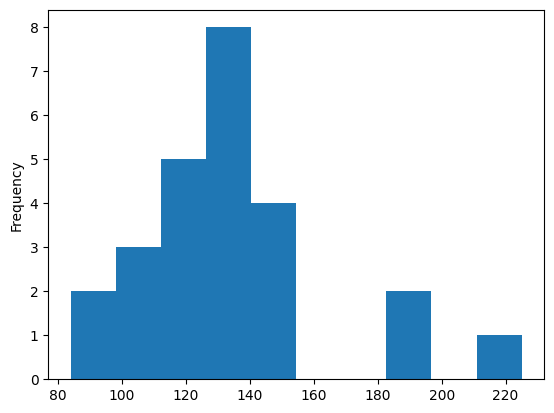

In [238]:
df_movies5[df_movies5['genre']=='History']['runtime'].plot(kind='hist',bins=10)